# CSCI 3360: Course Project
**Project Members:** JP Park, Yiren Hou, Martha Sikora, Pragya Bhayana
**Dataset:** [Predicting Depression, Anxiety, and Stress](https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales) from [Kaggle](https://www.kaggle.com) by [Yam Peleg](https://www.kaggle.com/yamqwe)

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.gridspec import GridSpec
from matplotlib.figure import Figure
from matplotlib.axes import Axes

from typing import Dict, Tuple, List

In [112]:
df = pd.read_csv("data/cleaned.csv")

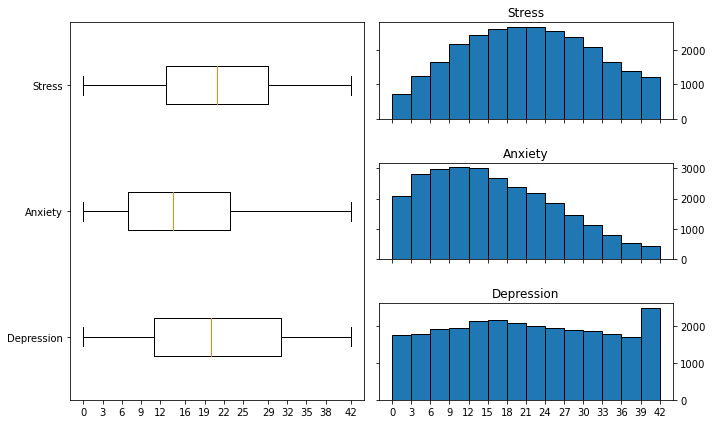

In [113]:
gs: GridSpec = GridSpec(nrows=3, ncols=2)
fig: Figure = plt.figure(figsize=(10, 6))

score_cols = ['depression_score', 'anxiety_score', 'stress_score']
labels = ['depression', 'anxiety', 'stress']

ax0: Axes = fig.add_subplot(gs[:, 0])
ax0.boxplot(df[score_cols],
            vert=False, labels=list(map(lambda s: s.title(), labels)))
ax0.set_xticks(np.linspace(0, 42, 14, dtype=int))

for i, label in enumerate(reversed(labels)):
    ax: Axes = fig.add_subplot(gs[i, 1])

    _, bins, _ = ax.hist(df[f'{label}_score'], bins=14, edgecolor='black')

    ax.set_title(label.title())
    ax.set_xticks(bins)

    if i < 2:
        ax.tick_params(axis='x', labelcolor='none')

    ax.tick_params(axis='y', which='both',
                   labelleft=False, labelright=True, right=True)

fig.tight_layout()

<AxesSubplot:xlabel='age'>

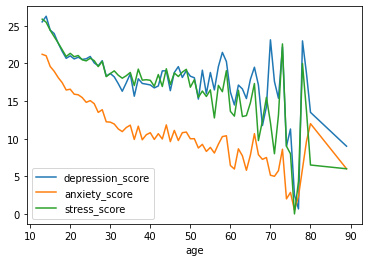

In [114]:
fig, ax = plt.subplots()

age_group = df.groupby('age')
age_group[score_cols].mean().plot(ax=ax)